In [1]:
from qulacs import Observable, QuantumCircuit, QuantumState, ParametricQuantumCircuit,QuantumCircuitSimulator
from qulacs.gate import Y,CNOT,merge

In [2]:
import numpy as np

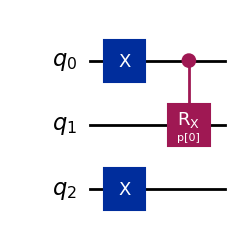

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector


p = ParameterVector('p',1)
x = ParameterVector('x',1)

qc = QuantumCircuit(3)

qc.x(0)
#qc.rx(p[0],1)
qc.crx(2.0*p[0],0,1)
qc.x(2)



#from qiskit.circuit.random import random_circuit
#qc = random_circuit(3, 10, seed=41)
qc.draw()

In [4]:

from squlearn.util.qulacs import *



test = QulacsCircuit(qc)


print("test._operation_list",test._operation_list)
print("test._param_list",test._param_list)
print("test._qubit_list",test._qubit_list)
print("test._func_list",test._func_list)
print("test._func_grad_list",test._func_grad_list)
print("test._free_parameters",test._free_parameters)

self._qiskit_circuit         ┌───┐                                                         »
q_0: ───┤ X ├─────■───────────────────────────────────────────────────»
     ┌──┴───┴──┐┌─┴─┐┌───────┐┌─────────┐┌────────────────┐┌─────────┐»
q_1: ┤ Rz(π/2) ├┤ X ├┤ Rz(0) ├┤ Rx(π/2) ├┤ Rz(π - p[0]/2) ├┤ Rx(π/2) ├»
     └──┬───┬──┘└───┘└───────┘└─────────┘└────────────────┘└─────────┘»
q_2: ───┤ X ├─────────────────────────────────────────────────────────»
        └───┘                                                         »
«                                                                     »
«q_0: ────────────■───────────────────────────────────────────────────»
«     ┌────────┐┌─┴─┐┌───────┐┌─────────┐┌────────────────┐┌─────────┐»
«q_1: ┤ Rz(3π) ├┤ X ├┤ Rz(0) ├┤ Rx(π/2) ├┤ Rz(p[0]/2 + π) ├┤ Rx(π/2) ├»
«     └────────┘└───┘└───────┘└─────────┘└────────────────┘└─────────┘»
«q_2: ────────────────────────────────────────────────────────────────»
«                                          

In [5]:
test.get_circuit_func()

self._qualcs_gates_parameters ['p']


<function squlearn.util.qulacs.qulacs_circuit.QulacsCircuit.get_circuit_func.<locals>.qulacs_circuit(*args)>

In [6]:
param = np.array([0.5])

circ = test.get_circuit_func()(param)

state = QuantumState(3)
sim = QuantumCircuitSimulator(circ, state)
sim.initialize_state(0)
sim.simulate()

observable = Observable(3)
observable.add_operator(1.0, "Z 2 Z 1 Z 0")

print(sim.get_expectation_value(observable))



self._qualcs_gates_parameters ['p']
Adding X gate on qubit 0
Adding RZ gate with angle -1.5707963267948966 on qubit 1
Adding CNOT gate with control qubit 0 and target qubit 1
Adding RZ gate with angle -0.0 on qubit 1
Adding RX gate with angle -1.5707963267948966 on qubit 1
Adding Parameterized RZ gate with angle -2.89159265358979 on qubit 1
Adding RX gate with angle -1.5707963267948966 on qubit 1
Adding RZ gate with angle -9.42477796076938 on qubit 1
Adding CNOT gate with control qubit 0 and target qubit 1
Adding RZ gate with angle -0.0 on qubit 1
Adding RX gate with angle -1.5707963267948966 on qubit 1
Adding Parameterized RZ gate with angle -3.39159265358979 on qubit 1
Adding RX gate with angle -1.5707963267948966 on qubit 1
Adding RZ gate with angle -7.853981633974483 on qubit 1
Adding X gate on qubit 2
(0.877582561890374+0j)


In [7]:
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp



est = Estimator()

est.run(qc,SparsePauliOp('ZZZ',),param).result().values

C:\Users\DKR\AppData\Local\Temp\ipykernel_22560\940498755.py:6: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  est = Estimator()


array([0.87758256])